# **Walmart Sales Prediction**
---
Author :
Christophe NORET

In [11]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

# Exploratory Data Analysis

## Loading .CSV

In [12]:
# Reading .csv
walmart_sales = pd.read_csv('data/Walmart_Store_sales.csv')

## Dataset overview

In [13]:
# First rows of the dataset
print("Dataset overview :")
display(walmart_sales.head())


Dataset overview :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [14]:
print(f"Number of rows : {walmart_sales.shape[0]}")
print(f"Number of columns : {walmart_sales.shape[1]}")

Number of rows : 150
Number of columns : 8


### Dataset characteristics

In [15]:
# Print the characteristics of the dataset
print(walmart_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB
None


### Dataset summary
* **Store**: Numeric identifier for Walmart stores.
* **Date**: Dates as strings. Requires transformation. (contains missing values).
* **Weekly_Sales**: Target variable (contains missing values).
* **Holiday_Flag**: Binary flag for holidays (contains missing values) 1 = holiday, 0 = no holiday.
* **Temperature**: Numeric variable (contains missing values).
* **Fuel_Price**: Numeric variable (contains missing values).
* **CPI**: Consumer Price Index (contains missing values).
* **Unemployment**: Unemployment rate (contains missing values).

In [16]:
walmart_sales.describe(include = "all")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


### Missing values and duplicates

In [17]:
# Calculation of the percentage of missing values
print("\nwalmart_sales missing values:")
nan_count = walmart_sales.isna().sum()
nan_percentage = (walmart_sales.isna().mean() * 100).round(2)
nan_info = pd.concat([nan_count, nan_percentage], axis = 1, keys = ['NaN Count', '% of NaN'])
print(nan_info)

## Checking for duplicates
print("\nNumber of duplicates  : ", walmart_sales.duplicated().sum())


walmart_sales missing values:
              NaN Count  % of NaN
Store                 0      0.00
Date                 18     12.00
Weekly_Sales         14      9.33
Holiday_Flag         12      8.00
Temperature          18     12.00
Fuel_Price           14      9.33
CPI                  12      8.00
Unemployment         15     10.00

Number of duplicates  :  0


Several columns have missing values, including :
* **Date**: 18 missing values.
* **Weekly_Sales**: 14 missing values. (target)
* **Holiday_Flag, Temperature, Fuel_Price, CPI, and Unemployment** also have some missing values.

### Handling missing values

**Weekly_Sales (target)**: Delete rows with missing values, as imputing could bias predictions.

In [18]:
# Delete lines where the Weekly_Sales target is missing
walmart_sales = walmart_sales.dropna(subset = ['Weekly_Sales'])

Date

**CPI & Unemployment** \
We can fill missing values using forward fill method since these values are typically reported monthly or quarterly.

In [19]:
# Fill missing values in CPI and Unemployment using ffill
features[['CPI', 'Unemployment']] = features[['CPI', 'Unemployment']].ffill()

# Check for any remaining missing values
print(walmart_sales.isnull().sum())

NameError: name 'features' is not defined

### Date column conversion

**Date column format** \
We can convert the "Date" columns in a datetime format.

In [ ]:
# Convert Date columns to datetime format
walmart_sales['Date'] = pd.to_datetime(walmart_sales['Date'], format = '%d-%m-%Y')

### Outliers

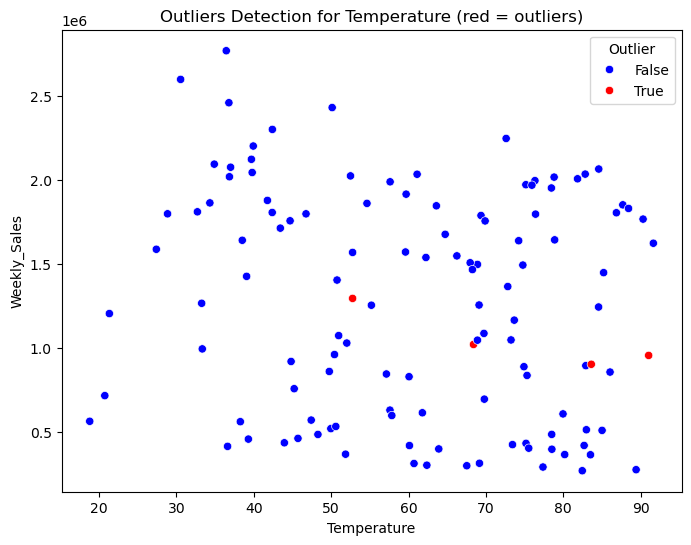

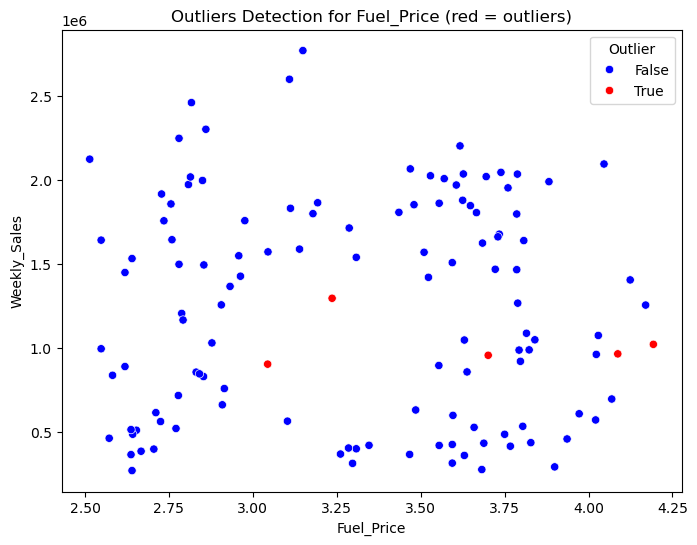

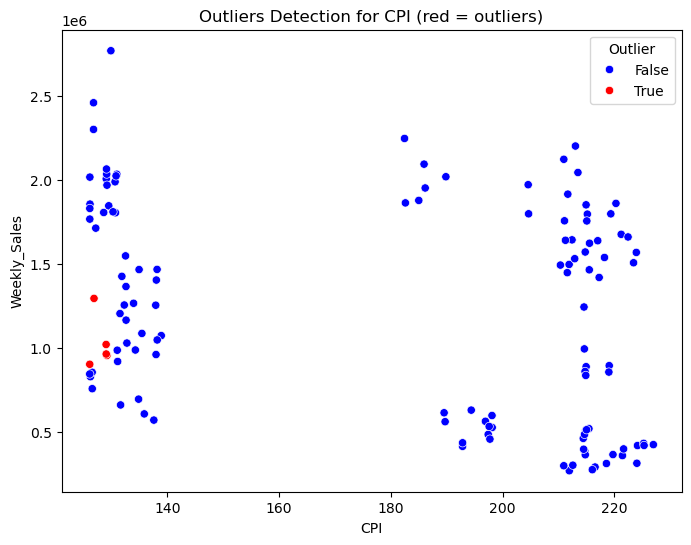

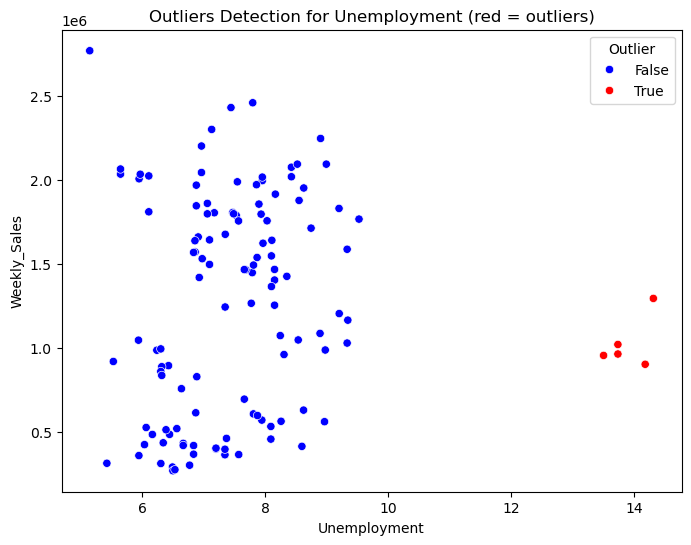

In [ ]:
columns_to_check = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Créer une copie des données originales pour comparer avant nettoyage
data_with_outliers = walmart_sales.copy()
data_with_outliers['Outlier'] = False

# Marquer les valeurs aberrantes dans la copie
for col in columns_to_check:
    mean = walmart_sales[col].mean()
    std = walmart_sales[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    data_with_outliers.loc[(data_with_outliers[col] < lower_bound) | (data_with_outliers[col] > upper_bound), 'Outlier'] = True

# Visualisation des valeurs aberrantes dans un scatter plot
for col in columns_to_check:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data_with_outliers, x=col, y='Weekly_Sales', hue='Outlier', palette={False: 'blue', True: 'red'})
    plt.title(f"Outliers Detection for {col} (red = outliers)")
    plt.xlabel(col)
    plt.ylabel("Weekly_Sales")
    plt.show()

## Data visualisation

### Correlation matrix

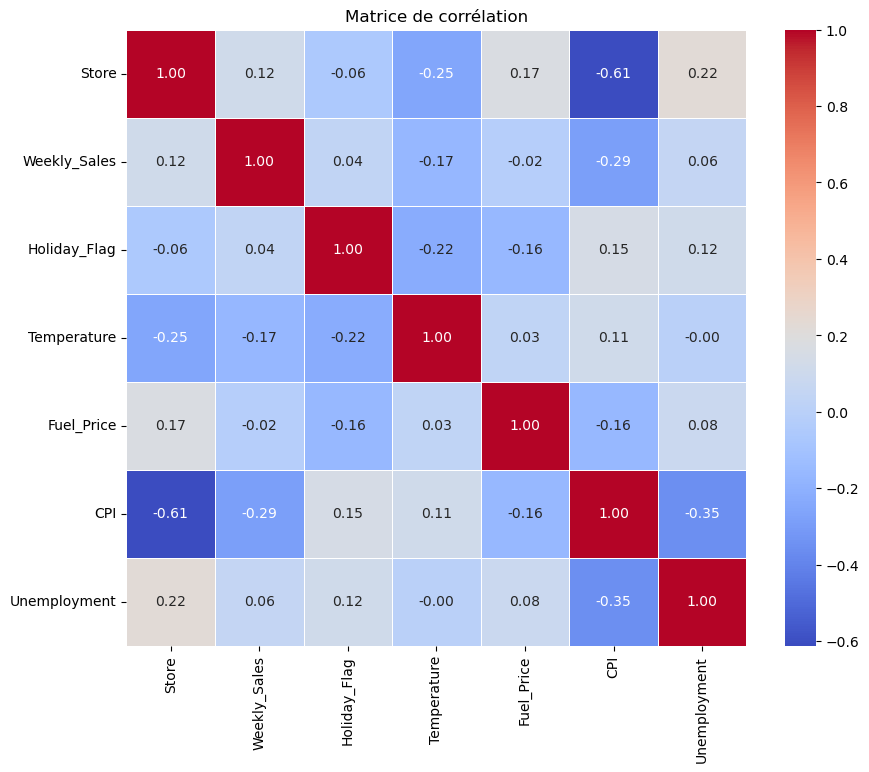

In [ ]:
numerical_columns = walmart_sales.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = walmart_sales[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


* Promotions have a weak but positive impact on sales, suggesting that while they do help in increasing sales, the effect is not very strong.
* There are stronger intercorrelations among certain promotions, indicating they may be applied together.
* Other factors like temperature, fuel price, and economic indicators (CPI and unemployment) have weak correlations with sales.

### Distribution Analysis

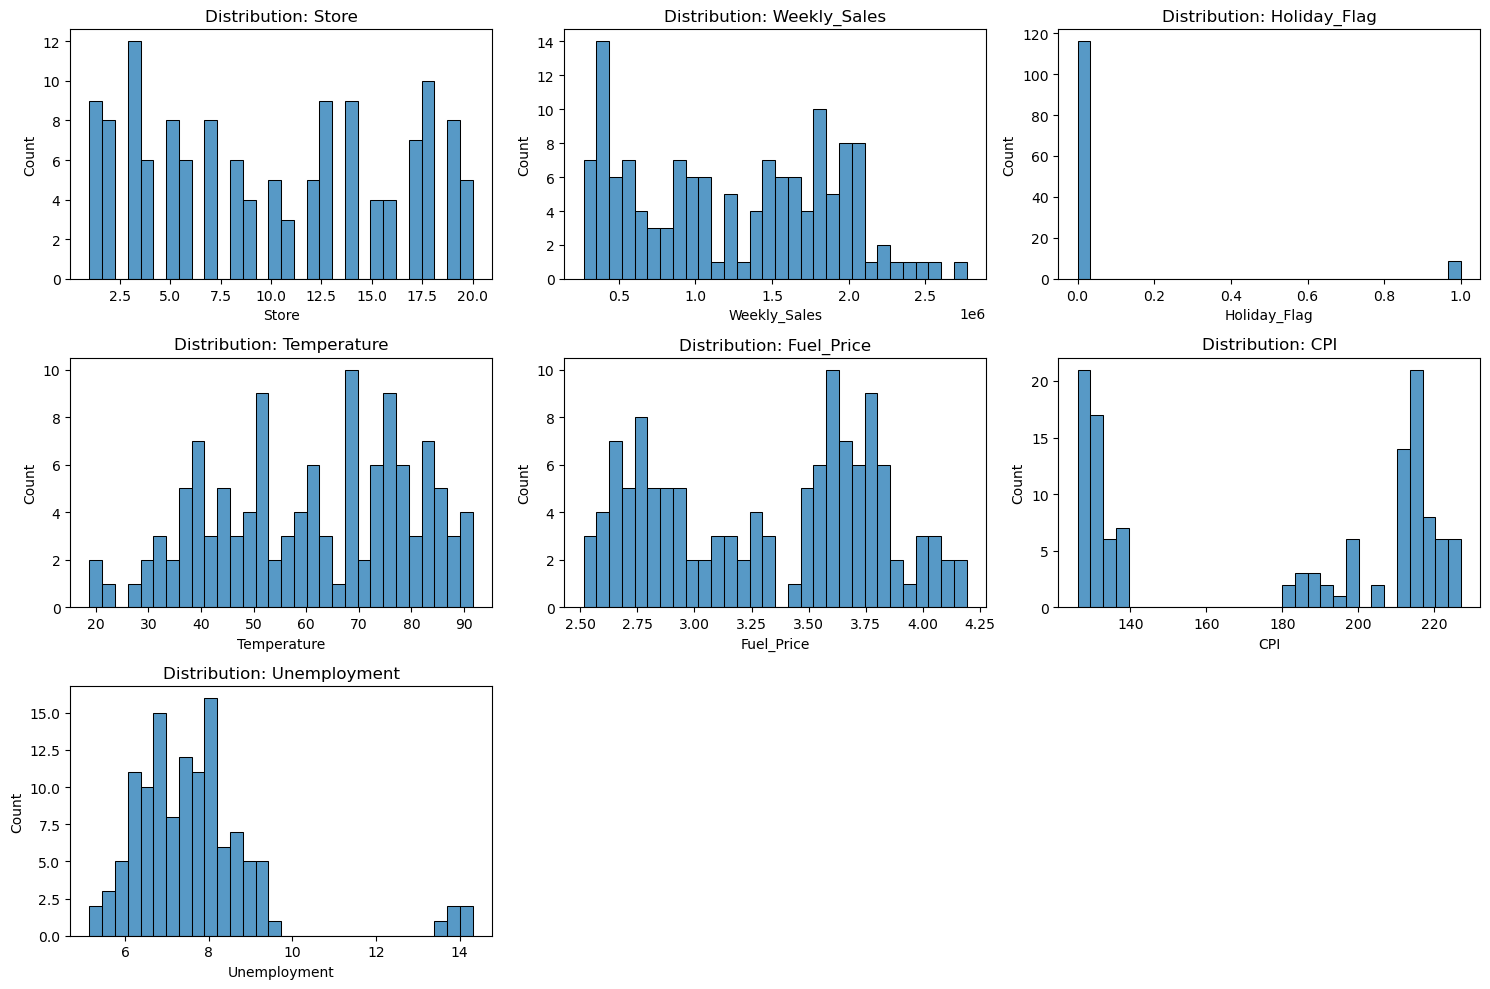

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(walmart_sales[column], kde= False, bins=30)
    plt.title(f'Distribution: {column}')

plt.tight_layout()
plt.show()

We can note the presence of negative values but above all that the majority of values are low compared to certain extreme values.
These could be very large stores, such as showcases, or simply outliers to be corrected.

# Machine Learning

### Encoding & Spliting

In [ ]:
# Selecting features and target
features = walmart_sales[['Store', 'Holiday_Flag', 'Temperature', 
                          'Fuel_Price', 'CPI', 'Unemployment', 
                          'Year', 'Month', 'Day', 'DayOfWeek']]

target = walmart_sales['Weekly_Sales']

print("\nFeatures selected:")
print(features.head())

print(f"\nTarget variable : {target.name}")


Features selected:
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0    6.0           NaN        59.61       3.045  214.777523         6.858
1   13.0           0.0        42.38       3.435  128.616064         7.470
3   11.0           0.0        84.57         NaN  214.556497         7.346
4    6.0           0.0        78.89       2.759  212.412888         7.092
5    4.0           0.0          NaN       2.756  126.160226         7.896

Target variable : Weekly_Sales


In [ ]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in features.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
Found categorical features  []


In [ ]:

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

print("\nTraining features sample:")
display(X_train.head())



Training set shape: (108, 6)
Testing set shape: (28, 6)

Training features sample:


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
12,7.0,0.0,36.61,3.767,192.826069,8.595
74,1.0,0.0,67.97,3.594,223.425723,NaN
143,3.0,0.0,78.53,2.705,214.495838,7.343
83,15.0,0.0,79.97,3.972,135.873839,7.806
92,3.0,0.0,NaN,2.667,214.702765,NaN


In [ ]:
# Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled training features sample:")
display(pd.DataFrame(X_train_scaled, columns = X_train.columns).head())


Scaled training features sample:


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,-0.539697,-0.274352,-1.346732,0.858644,0.356280,0.602410
1,-1.527617,-0.274352,0.393130,0.506719,1.122819,NaN
2,-1.198310,-0.274352,0.979001,-1.301730,0.899120,-0.164730
3,0.777529,-0.274352,1.058893,1.275666,-1.070405,0.118965
4,-1.198310,-0.274352,NaN,-1.379031,0.904304,NaN


### Model selection and training

In [ ]:
# Model selection
model_choice = "Linear Regression (Baseline)"  # Or "Linear Regression (Ridge)"

if model_choice == "Linear Regression":
    model = LinearRegression()
elif model_choice == "Linear Regression (Ridge)":
    model = Ridge()

# Training
model.fit(X_train_scaled, y_train)
print(f"\n{model_choice} model trained successfully!")


Random Forest Regressor model trained successfully!


### Model evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Calcul des métriques de performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 30763137.02
Root Mean Squared Error (RMSE): 5546.45
R-squared (R²): 0.94
Mean Absolute Error (MAE): 1925.62


### Predictions

In [ ]:
# Input data for prediction
store = 5  
dept = 3  
is_holiday = 0  
temperature = 70.0  
fuel_price = 3.0  
cpi = 220.0  
unemployment = 7.0  
store_type = 1 

# Convert input data into DataFrame with column names
input_data = pd.DataFrame([[store, dept, is_holiday, temperature, 
                            fuel_price, cpi, unemployment, store_type]],
                            columns = features.columns)

# Scaling input_data
input_data_scaled = scaler.transform(input_data)

# Sales prediction
prediction = model.predict(input_data_scaled)
print(f"\nPredicted Weekly Sales: ${prediction[0]:,.2f}")


Predicted Weekly Sales: $3,782.18
